In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [4]:
nan = df[['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']]
nan

,Rating,Type,Content Rating,Current Ver,Android Ver
0,4.1,Free,Everyone,1.0.0,4.0.3 and up
1,3.9,Free,Everyone,2.0.0,4.0.3 and up
2,4.7,Free,Everyone,1.2.4,4.0.3 and up
3,4.5,Free,Teen,Varies with device,4.2 and up
4,4.3,Free,Everyone,1.1,4.4 and up
...,...,...,...,...,...
10836,4.5,Free,Everyone,1.48,4.1 and up
10837,5.0,Free,Everyone,1.0,4.1 and up
10838,NaN,Free,Everyone,1.0,2.2 and up
10839,4.5,Free,Mature 17+,Varies with device,Varies with device


In [5]:
# Calculate the number of NaN values
for col in nan.columns:
    na_count = nan[col].isna().sum()
    print(f"{col} has {na_count} NaN values")

Rating has 1474 NaN values
Type has 1 NaN values
Content Rating has 1 NaN values
Current Ver has 8 NaN values
Android Ver has 3 NaN values


In [6]:
# checking genres and titles associated with NaN Ratings
rating = df[['App', 'Category', 'Rating']]
rating = rating[rating.Rating.isna() == True]

In [7]:
rating.head()

,App,Category,Rating
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN
113,Wrinkles and rejuvenation,BEAUTY,NaN
123,Manicure - nail design,BEAUTY,NaN
126,Skin Care and Natural Beauty,BEAUTY,NaN
129,"Secrets of beauty, youth and health",BEAUTY,NaN


In [8]:
rating.Category.unique()

array(['ART_AND_DESIGN', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'DATING', 'EDUCATION', 'EVENTS', 'FOOD_AND_DRINK',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'FAMILY', 'MEDICAL',
       'TOOLS', 'PARENTING', 'VIDEO_PLAYERS', 'PERSONALIZATION', 'GAME',
       'PHOTOGRAPHY', 'SOCIAL', 'SPORTS', 'COMMUNICATION', 'PRODUCTIVITY',
       'AUTO_AND_VEHICLES', 'FINANCE', 'LIFESTYLE', 'TRAVEL_AND_LOCAL',
       'SHOPPING', 'HEALTH_AND_FITNESS', 'WEATHER', 'NEWS_AND_MAGAZINES',
       'MAPS_AND_NAVIGATION'], dtype=object)

In [9]:
# Impute NaNs with median respective to category


In [10]:
drop_df = df.dropna()

In [11]:
drop_df.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [12]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


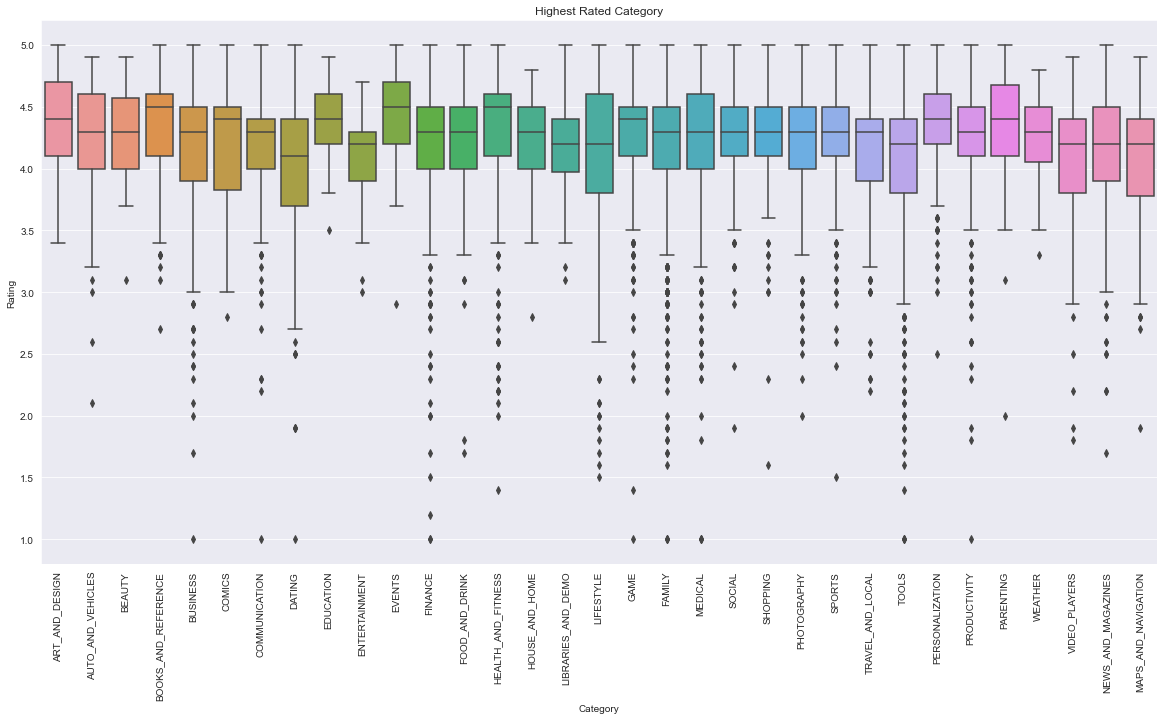

In [13]:
categ = drop_df.Category
rate = drop_df.Rating
dls = drop_df.Installs

fig = plt.figure(figsize = (20, 10))
sns.boxplot(x=categ, y=rate)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

In [14]:
# Remove everything below 2.5 

def outlier_treatment(df_column):
    sorted(df_column)
    Q1, Q3 = np.percentile(df_column, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 - (1.5*IQR)
    return lower_range, upper_range

lower, upper = outlier_treatment(drop_df.Rating)

rating_cln = drop_df[drop_df.Rating >= lower]
rate1 = rating_cln.Rating

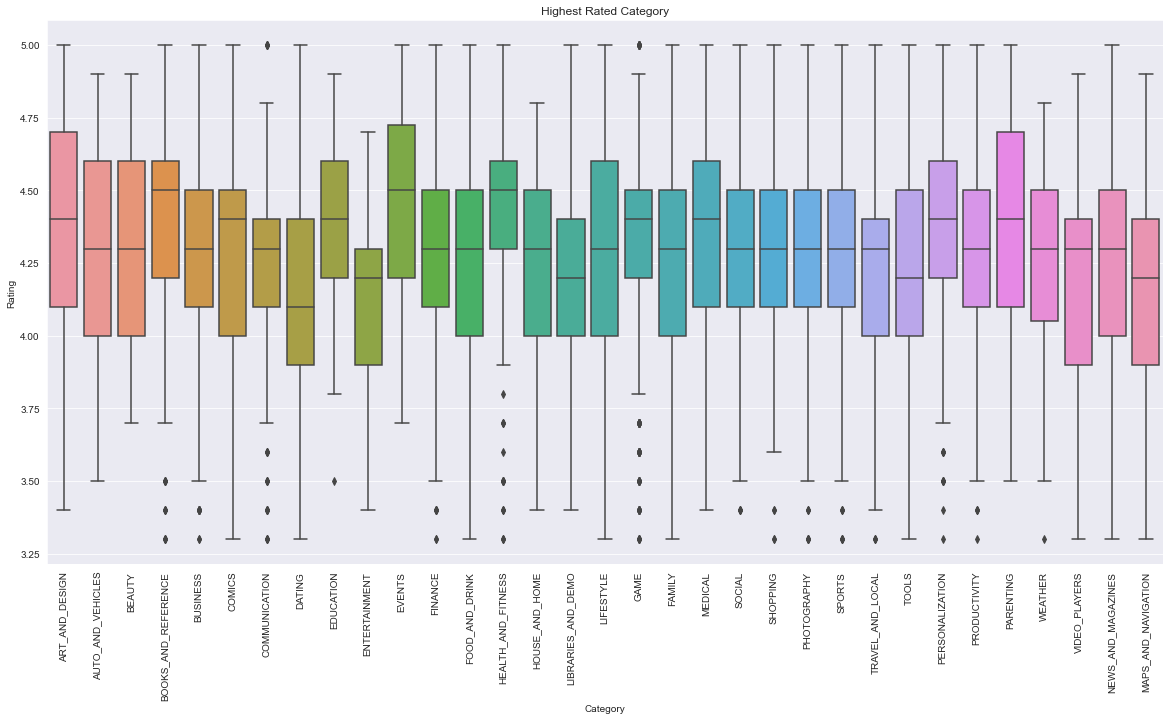

In [15]:
fig = plt.figure(figsize = (20, 10))
sns.boxplot(x=categ, y=rate1)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

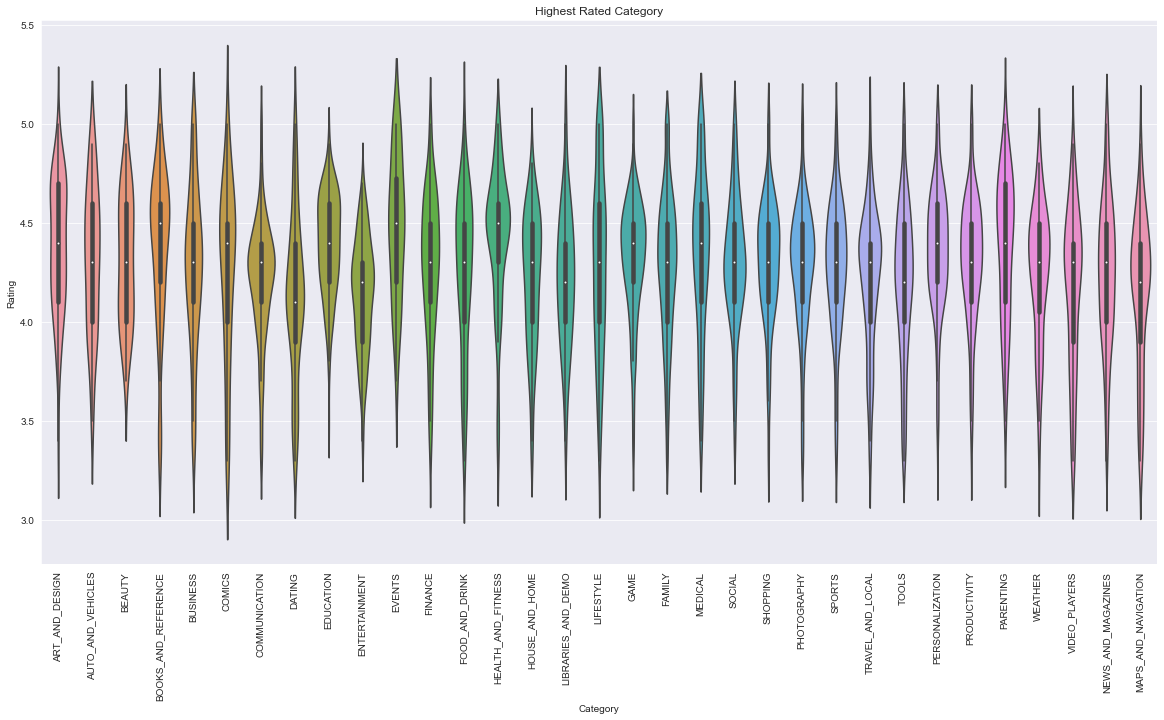

In [16]:
fig = plt.figure(figsize = (20, 10))
sns.violinplot(x=categ, y=rate1)
plt.xticks(rotation=90)
plt.title('Highest Rated Category')
plt.show();

In [25]:
# turn Installs to floats

# replacing '+' and ',' values
drop_df['Installs'] = drop_df['Installs'].str.replace('+', '')
drop_df['Installs'] = drop_df['Installs'].str.replace(',', '')
drop_df['Installs'] = drop_df['Installs'].astype(float)
drop_df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

# Create New DataFrame for Categories

In [29]:
cat = pd.DataFrame(drop_df['Category'].unique())
cat = cat.rename(columns={0 : 'category'})
cat.head()

,category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS


In [39]:
cats = list(drop_df['Category'].unique())

cats

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [42]:
for i in range(len(cats)):
    cdf = drop_df[drop_df['Category' == cats[i]]]
    sum_ = ef.Installs.sum()
    print(f"{cats[i]} has over {sum_} downloads")
        

KeyError: False